In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [35]:
df = pd.read_csv('data/results.csv', usecols = (1,2,3,5,8), names =['raceId','driverId','constructorId','grid','positionOrder'])
races = pd.read_csv('data/races.csv', usecols = [0,1,3], names =['raceId','year','circuitId'])
teams = pd.read_csv('data/constructors.csv', usecols = [0,2], names =['constructorId','name'])

In [36]:
df.head()

,raceId,driverId,constructorId,grid,positionOrder
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5


In [37]:
race_dict = dict(zip(races.values[:,0], races.values[:,1]))
df['years'] = df['raceId'].map(race_dict) 
position_dict = {1:'top10',2:'top10',3:'top10',4:'top10',5:'top10',6:'top10',7:'top10',8:'top10',9:'top10',10:'top10',11:'last10',12:'last10',13:'last10',14:'last10',15:'last10',16:'last10',17:'last10',18:'last10',19:'last10',20:'last10',21:'last10',22:'last10'}
#df['positionOrder'] = df['positionOrder'].map(position_dict)
df.head()

,raceId,driverId,constructorId,grid,positionOrder,years
0,18,1,1,1,1,2008
1,18,2,2,5,2,2008
2,18,3,3,7,3,2008
3,18,4,4,11,4,2008
4,18,5,1,3,5,2008


In [40]:
results = df[df['years'] >= 2017].drop('years', axis = 1).dropna()
labels = results.columns
data = results.values[:,[0,1,2,3,4]]
target = results.values[:,4]

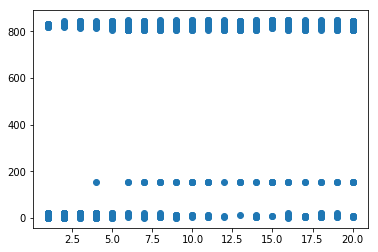

In [41]:
plt.scatter(target,data[:,1])

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
dataN = pd.DataFrame(x_scaled)

/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
data_corr = results.corr()
data_corr

,raceId,driverId,constructorId,grid,positionOrder
raceId,1.000000,0.048140,0.099428,-0.024193,0.000000
driverId,0.048140,1.000000,-0.161934,0.304808,0.245384
constructorId,0.099428,-0.161934,1.000000,-0.108341,-0.083276
grid,-0.024193,0.304808,-0.108341,1.000000,0.571096
positionOrder,0.000000,0.245384,-0.083276,0.571096,1.000000


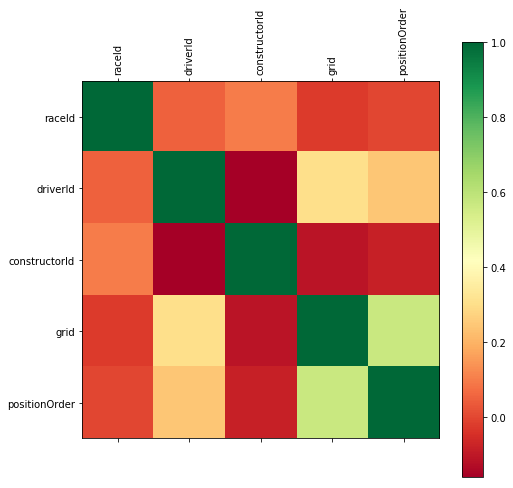

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(data_corr, cmap = plt.cm.RdYlGn, interpolation = 'nearest')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation = 90)
fig.colorbar(cax)
plt.show()

In [45]:
pca = PCA(n_components=5)
reduced_data_pca = pca.fit_transform(dataN)

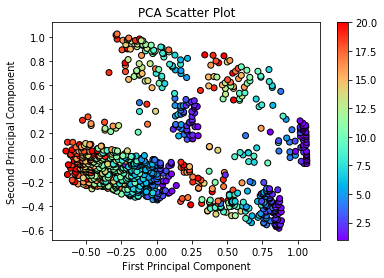

In [46]:
x = reduced_data_pca[:, 0]
y = reduced_data_pca[:, 1]
plt.scatter(x, y, c= target ,edgecolors= "black", cmap=plt.cm.rainbow)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.colorbar()
plt.show()

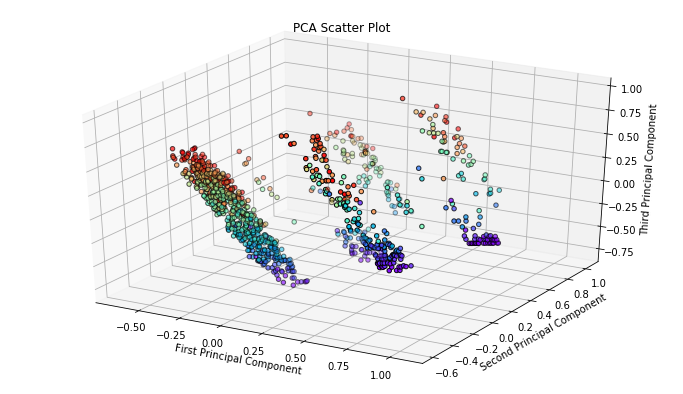

In [47]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
x = reduced_data_pca[:, 0]
y = reduced_data_pca[:, 1]
z = reduced_data_pca[:, 2]
ax.scatter(x, y,z, c= target ,edgecolors= "black", cmap=plt.cm.rainbow)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [48]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
variation = eigenvalues/(5-1)

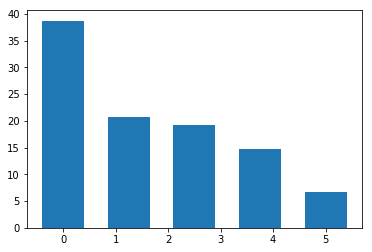

In [49]:
plt.bar(np.linspace(0,5,5), variation/np.sum(variation)*100)
plt.show()

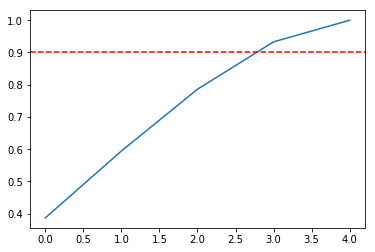

In [50]:
pca = PCA().fit(dataN)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9, 0,6, ls = '--', c = 'r')
plt.show()

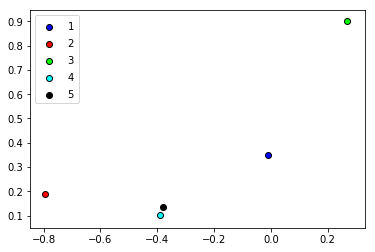

In [51]:
colors = ['blue', 'red', 'lime', 'cyan','k']
for i in range(len(colors)):
    plt.scatter(eigenvectors[0,i],eigenvectors[1,i], c= colors[i], label = '$%d$'%(i+1), edgecolors='k')
plt.legend(loc='best')
plt.show()